# Sprint6課題 機械学習スクラッチ決定木

## 【問題1】ジニ不純度を求める関数
まずは空間を分割するための指標値、ジニ不純度を計算する関数を作成してください。ノード$t$に対するジニ不純度$I(t)$は以下の数式で求まります。
$$
I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
$$


$t$ : ノードのインデックス

$i$ : クラスのインデックス

$K$ : クラスの数

$C_i$ : $i$番目のクラス

$P(C_i|t)$ :　$t$番目のノードにおける$C_i$の割合

$N_{t,i}$ : $t$番目のノードのi番目のクラスに属するサンプル数

$N_{t,all}$ : $t$番目のノードのサンプルの総数

まずは簡単な例を作り、手計算と関数の結果を比較してください。

**例**

- クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
- クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
- クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
- クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000  


この他にもいくつか試してください。



## 【問題2】情報利得を求める関数
次に、情報利得を計算する関数を作成してください。先ほど作成したジニ不純度$I(t)$を計算する関数を呼び出して使います。情報利得$IG$は以下の数式で求まります。

$$
    IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right)
$$

$p$ : 親ノードを示すインデックス

$left$ : 左側のノードを示すインデックス

$right$ : 右側のノードを示すインデックス

まずは簡単な例を作り、手計算と関数の結果を比較してください。

例

左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

この他にもいくつか試してください。

#### ※アドバンス課題は最下部に記載

In [1]:
#ライブラリのインポート

import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn import metrics

### 手計算で確認

In [2]:
#クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
gini_score = 1 - ((15 / 30) ** 2 + (15 / 30) ** 2)
print('gini : {:.3f}'.format(gini_score))

gini : 0.500


In [3]:
#クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
gini_score = 1 - ((15 / 45) ** 2 + (15 / 45) ** 2 + (15 / 45) ** 2)
print('gini : {:.3f}'.format(gini_score))

gini : 0.667


In [4]:
#クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
gini_score = 1 - ((18 / 30) ** 2 + (12 / 30) ** 2)
print('gini : {:.3f}'.format(gini_score))

gini : 0.480


In [5]:
#クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000
gini_score = 1 - ((30 / 30) ** 2 + (0 / 30) ** 2)
print('gini : {:.3f}'.format(gini_score))

gini : 0.000


[決定木入門編 「ウォーリーを探せ」から考える不純度の考え方](http://www.randpy.tokyo/entry/decision_tree_theory)

In [6]:
#分割ルール1:数学60点以上
gini_yes = 1 - ((60 / 90) ** 2 + (30 / 90) ** 2)
print('gini_yes : {:.3f}'.format(gini_yes))

gini_no = 1 - ((40 / 110) ** 2 + (70 / 110) ** 2)
print('gini_no : {:.3f}'.format(gini_no))

#情報利得
gini_p= 1 - ((100 / 200) ** 2 + (100 / 200) ** 2)

ig = gini_p - (gini_yes * 90 / 200) - (gini_no * 110 / 200)
print('Information Gain : {:.3f}'.format(ig))

gini_yes : 0.444
gini_no : 0.463
Information Gain : 0.045


In [7]:
#分割ルール2:国語80点以上
gini_yes = 1 - ((80 / 100) ** 2 + (20 / 100) ** 2)
print('gini_yes : {:.3f}'.format(gini_yes))

gini_no = 1 - ((20 / 100) ** 2 + (80 / 100) ** 2)
print('gini_no : {:.3f}'.format(gini_no))

#情報利得
gini_p= 1 - ((100 / 200) ** 2 + (100 / 200) ** 2)

ig = gini_p - (gini_yes * 100 / 200) - (gini_no * 100 / 200)
print('Information Gain : {:.3f}'.format(ig))

gini_yes : 0.320
gini_no : 0.320
Information Gain : 0.180


In [8]:
'''
上記でテストデータを作る
'''
#学校Aの数学のデータを作る
math_over60_A = np.random.randint(60,101, 60)
math_unser60_A = np.random.randint(0,60, 40)
math_A = np.concatenate([math_over60_A, math_unser60_A], 0)
math_A = math_A.reshape(100,1)

#学校Aの国語のデータを作る
japanese_over80_A = np.random.randint(80,101, 80)
japanese_unser80_A = np.random.randint(0,80, 20)
japanese_A = np.concatenate([japanese_over80_A, japanese_unser80_A], 0)
japanese_A = japanese_A.reshape(100,1)

#学校Aのテストデータまとめる（学校Aのラベル：0）
school_A = np.concatenate([math_A, japanese_A], 1)
school_A = np.insert(school_A, 2,0, axis=1)

#学校Bの数学のデータを作る
math_over60_B = np.random.randint(60,101, 30)
math_unser60_B = np.random.randint(0,60, 70)
math_B = np.concatenate([math_over60_B, math_unser60_B], 0)
math_B = math_B.reshape(100,1)

#学校Bの国語のデータを作る
japanese_over80_B = np.random.randint(80,101, 20)
japanese_unser80_B = np.random.randint(0,80, 80)
japanese_B = np.concatenate([japanese_over80_B, japanese_unser80_B], 0)
japanese_B = japanese_B.reshape(100,1)

#学校Bのテストデータまとめる（学校Bのラベル：1）
school_B = np.concatenate([math_B, japanese_B], 1)
school_B = np.insert(school_B, 2,1, axis=1)


#学校のテストデータまとめる
school_score = np.concatenate([school_A, school_B], 0)

In [9]:
#特徴量を格納
X = school_score[:,0:2]

#目的変数を格納
y = school_score[:,2:3]

<function matplotlib.pyplot.show(*args, **kw)>

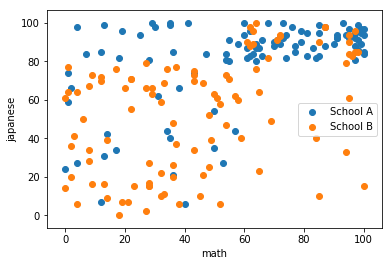

In [10]:
import matplotlib.pyplot as plt

plt.scatter(school_score[school_score[:,2]==0][:,0], school_score[school_score[:,2]==0][:,1], label='School A')
plt.scatter(school_score[school_score[:,2]==1][:,0], school_score[school_score[:,2]==1][:,1], label='School B')

plt.xlabel('math')
plt.ylabel('japanese')
plt.legend()

plt.show

In [11]:
'''
手計算と同様の結果が出るか確認
'''

#数学が60点以上(yes)のインデックス
left_index=np.where(X[:,0]>=60)[0]

#合計人数
left = len(np.where(X[:,0]>=60)[0])

#学校Aの人数
left_0 = len(np.where(y[left_index]==0)[0])

#学校Bの人数
left_1 = len(np.where(y[left_index]==1)[0])

#数学が60より小さい(no)のインデックス
right_index=np.where(X[:,0]<60)[0]

#合計人数
right = len(np.where(X[:,0]<60)[0])

#学校Aの人数
right_0 = len(np.where(y[right_index]==0)[0])

#学校Bの人数
right_1 = len(np.where(y[right_index]==1)[0])

#親ノードの計算
samples_0 = len(np.where(y==0)[0])
samples_1 = len(np.where(y==1)[0])
samples = len(y)

In [12]:
#yesグループのジニ係数
gini_left = 1 - ((left_0 / left) ** 2 + (left_1 / left) ** 2)
print('gini_yes : {:.3f}'.format(gini_left))

#noグループのジニ係数
gini_right = 1 - ((right_0 / right) ** 2 + (right_1 / right) ** 2)
print('gini_no : {:.3f}'.format(gini_right))

#情報利得
gini_p= 1 - ((samples_0 / samples) ** 2 + (samples_1 / samples) ** 2)

ig = gini_p - (gini_left * samples_0 / samples) - (gini_right * samples_1 / samples)
print('Information Gain : {:.3f}'.format(ig))


gini_yes : 0.444
gini_no : 0.463
Information Gain : 0.046


## 【問題3】深さ1の決定木分類器クラスの作成
深さが1の決定機分類器のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前は**ScratchDecesionTreeClassifier**としてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。

[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

深さ1とは空間の分割を1回だけ行うことを指します。

#### 決定木のアルゴリズム

ある特徴量の軸に対して、全てのパターンのしきい値を考え、それぞれの情報利得を計算していきます。各点の値をしきい値にする方法が一般的です。（ただし、実際にはしきい値の数は点の数よりひとつ少なくて良いことになります）分割の全候補の中で最も情報利得が大きくなるものをそのノードの分割方法として採用します。

ジニ不純度が0になるノード、または指定された深さのノードは葉と呼ばれます。葉にはそれぞれ推定時にどのクラスに分類するかを記録しておきます。ジニ不純度が0でない場合は、多数決により分類するクラスを決定します。

#### ヒント

これまでのスクラッチ課題に比べてアルゴリズムが複雑です。コードを書く前に、フローチャートなどで整理するようにしましょう。

In [13]:
'''
ざっくりまとめる
'''

threshold=60
index_left = np.where(X[:,0]>=threshold)[0]

if len(index_left) > 0:
    #各クラスに属するサンプル数を格納する空箱
    num_list_left = np.array([])
    #クラスごとにサンプル数を格納していく
    for i in np.unique(y):
        num_list_left = np.append(num_list_left, len(np.where(y[index_left]==i)[0]))

    #ジニ係数を計算する
    gini_left = 1 - np.sum((num_list_left / np.sum(num_list_left)) ** 2)
else:
    gini_left = 0.5

#判定基準はどう作る？
index_right = np.where(X[:,0]<threshold)[0]

if len(index_right) > 0:

    #各クラスに属するサンプル数を格納する空箱
    num_list_right = np.array([])
    #クラスごとにサンプル数を格納していく
    for i in np.unique(y):
        num_list_right = np.append(num_list_right, len(np.where(y[index_right]==i)[0]))

    #ジニ係数を計算する
    gini_right = 1 - np.sum((num_list_right / np.sum(num_list_right)) ** 2)
else:
    gini_right = 0.5

    
#親ノードインデックス?
num_list = np.array([])
#クラスごとにサンプル数を格納していく
for i in np.unique(y):
    num_list = np.append(num_list, len(np.where(y==i)[0]))
    

#情報利得
gini_p= 1 - np.sum((num_list / np.sum(num_list)) ** 2)

ig = gini_p - (gini_left * np.sum(num_list_left) / np.sum(num_list)) - (gini_right * np.sum(num_list_right) / np.sum(num_list))

print(ig)

0.045454545454545414


In [14]:
'''
ジニ係数の関数
'''
def gini_score2(n):
    '''
    n : ndarray
    クラスに属するサンプル数
    '''
    #ジニ係数を計算する
    gini = 1 - np.sum((n / np.sum(n)) ** 2)
    
    return gini


In [15]:
'''
情報利得の関数
'''

def information_gain2(p, left, right):
    n_left = np.sum(left)
    n_right = np.sum(right)
    n_all = n_left + n_right
    
    if n_left == 0 or n_right == 0:
        ig = 0
    else:
        ig = (
            gini_score2(p) - 
            ((n_left / n_all) * gini_score2(left)) - 
            ((n_right / n_all) * gini_score2(right))
        )
    return ig

In [16]:
#確認
information_gain2(num_list, num_list_left, num_list_right)

0.04545454545454547

### クラスにまとめる

In [17]:
#ライブラリのインポート
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


class ScratchDecesionTreeClassifier():
    """
    決定木分類のスクラッチ実装

    Parameters
    ----------

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.intercept_ 次の形のndarray, shape (1,)
     切片
    self.X_sv : 次の形のndarry, shape(n_samples(サポートベクトルの数), n_classes)
        サポートベクトル
    """

    def __init__(self):
        # ハイパーパラメータを属性として記録
        self.tree = None
        
    def fit(self, X, y):
        """
        決定木分類を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値(二値)

        Returns
        -------
        self : returns an instance of self.            

        """
        #pandasをnp.arrayに変換
        X = np.array(X)
        y = np.array(y)


        """親ノードの処理---開始"""
        num_list = np.array([])

        #クラスごとにサンプル数を格納していく
        for i in np.unique(y):
            num_list = np.append(num_list, len(np.where(y==i)[0]))

        """親ノードの処理---終了"""

        #特徴量の種類だけ回す
        for features in range(X.shape[1]):

            #情報利得を初期化
            ig = 0
            #特徴量の中にもつユニークな要素ごとを閾値として情報利得を計算していく
            for threshold in np.unique(X[:,features]):

                """左子ノードの処理---開始"""
                #閾値より大きいサンプルのインデックス
                index_left = np.where(X[:,features]>=threshold)[0]

                #各クラスに属するサンプル数を格納する空箱
                num_list_left = np.array([])
                #クラスごとにサンプル数を格納していく
                for i in np.unique(y):
                    num_list_left = np.append(num_list_left, len(np.where(y[index_left]==i)[0]))
                """左子ノードの処理---終了"""

                """右子ノードの処理---開始"""
                #閾値より大きいサンプルのインデックス
                index_right = np.where(X[:,features]<threshold)[0]

                #各クラスに属するサンプル数を格納する空箱
                num_list_right = np.array([])
                #クラスごとにサンプル数を格納していく
                for i in np.unique(y):
                    num_list_right = np.append(num_list_right, len(np.where(y[index_right]==i)[0]))
                """右子ノードの処理---終了"""

                #　情報利得を計算する
                tmp_ig = self.information_gain(num_list, num_list_left, num_list_right)
                
                #これまでの最も高い情報利得より高ければ、閾値とその特徴量(クラス)を格納
                if tmp_ig > ig:
                    ig = tmp_ig
                    self.threshold = threshold.copy()
                    self.features = features
                    
            # 情報利得が最高だった閾値から、左子ノードと右子ノードのクラス分けをする
            n_class0 = np.sum(y[X[:, self.features]>self.threshold]==np.unique(y)[0])
            n_class1 = np.sum(y[X[:, self.features]>self.threshold]==np.unique(y)[1])
            if n_class0 > n_class1:
                self.left_node = np.unique(y)[0]
                self.right_node = np.unique(y)[1]
            else:
                self.left_node = np.unique(y)[1]
                self.right_node = np.unique(y)[0]
                

    def predict(self, X):
        """
        決定木を使い分類予測する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        y_pred : 次の形のndarray, shape (n_samples, 1)
            決定木による分類結果
        """

        y_pred = np.where(
            X[:, self.features]>=self.threshold, 
            self.left_node, 
            self.right_node
        ).reshape(len(X), 1)

        return y_pred



    def gini_score(self, n):
        """
        ジニ係数を計算する

        Parameters
        ----------
        n : 次の形のndarray, shape (1, n_features)
          クラス別のサンプル数

        Returns
        -------
         gini_score : float
          ジニ係数

        """
        #ジニ係数を計算する
        gini = 1 - np.sum((n / np.sum(n)) ** 2)

        return gini

        
    def information_gain(self, p, left, right):
        """
        情報利得を計算する

        Parameters
        ----------
        p : 次の形のndarray, shape (1, n_features)
          親ノードのクラス別のサンプル数
        left : 次の形のndarray, shape (1, n_features)
          左子ノードのクラス別のサンプル数
        right : 次の形のndarray, shape (1, n_features)
          右子ノードのクラス別のサンプル数

        Returns
        -------
         ig : float
          情報利得

        """
        n_left = np.sum(left)
        n_right = np.sum(right)
        n_all = n_left + n_right

        if n_left == 0 or n_right == 0:
            ig = 0
            
        else:
            ig = (
                self.gini_score(p) - 
                ((n_left / n_all) * self.gini_score(left)) - 
                ((n_right / n_all) * self.gini_score(right))
            )
        return ig
    
        
    
    def decision_region(self, X_train, y_train, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['target1', 'target2']):
        """
        2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
        背景の色が学習したモデルによる推定値から描画される。
        散布図の点は学習用データである。

        Parameters
        ----------------
        X_train : ndarray, shape(n_samples, 2)
            学習用データの特徴量
        y_train : ndarray, shape(n_samples,)
            学習用データの正解値
        step : float, (default : 0.1)
            推定値を計算する間隔を設定する
        title : str
            グラフのタイトルの文章を与える
        xlabel, ylabel : str
            軸ラベルの文章を与える
        target_names= : list of str
            凡例の一覧を与える
        """
        # setting
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
        n_class = 2

        # pred
        mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
        mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
        pred = self.predict(mesh).reshape(mesh_f0.shape)
        
        # plot
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
        plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
        for i, target in enumerate(set(y_train)):
            plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
        
        
        plt.legend(handles=patches)
        plt.legend()
        
        plt.show()


In [18]:
sdtc = ScratchDecesionTreeClassifier()
sdtc.fit(X, y)

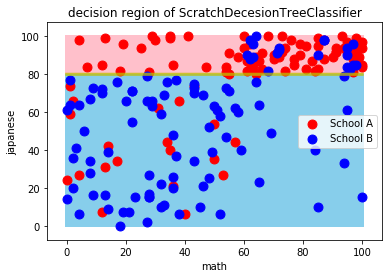

In [20]:
'''
決定領域をプロットする
'''
sdtc.decision_region(
    X_train=X, 
    y_train=y.reshape(-1),   #set型に対応するために一次元配列にする
    title='decision region of ScratchDecesionTreeClassifier', 
    xlabel='math', 
    ylabel='japanese', 
    target_names=['School A', 'School B']
)


## 【問題6】指標値の算出
分類に関する指標値で精度を確認してください。

### シンプルデータセット2で確認

In [21]:
X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
#インスタンス生成
sdtc2 = ScratchDecesionTreeClassifier()

#シンプルデータセット2にてモデル作成
sdtc2.fit(X2, y2)

#予測
y2_pred = sdtc2.predict(X2)

In [23]:
#予測
y2_pred = sdtc2.predict(X2)

#accuracyを計算
print('accuracy : {}'.format(metrics.accuracy_score(y2, y2_pred)))

#precisionを計算
print('precision : {}'.format(metrics.precision_score(y2, y2_pred)))

#recallを計算
print('recall : {}'.format(metrics.recall_score(y2, y2_pred)))

#f1を計算
print('f1 : {}'.format(metrics.f1_score(y2, y2_pred)))

accuracy : 0.675
precision : 0.8181818181818182
recall : 0.45
f1 : 0.5806451612903226


## 【問題7】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

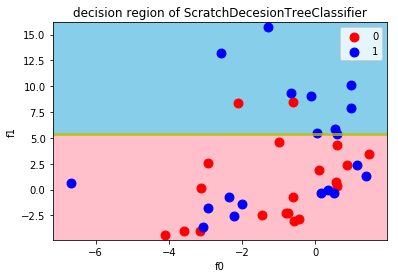

In [24]:
'''
決定領域をプロットする
'''
sdtc2.decision_region(
    X_train=X2, 
    y_train=y2.reshape(-1),   #set型に対応するために一次元配列にする
    title='decision region of ScratchDecesionTreeClassifier', 
    xlabel='f0', 
    ylabel='f1', 
    target_names=['0', '1']
)


## 【問題4】（アドバンス課題）深さ2の決定木分類器クラスの作成
問題3で作成したクラスを発展させ、深さが2の決定木分類器のクラスを作成してください。

深さ2とは空間の分割を2回行うことを指します。

#### ヒント

各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

In [25]:
#ライブラリのインポート
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

'''
関数の構成
    def gini_score : ジニ係数の計算

    def information_gain : 情報利得の計算
        
    class DecisionTreeNode : ノード別のインスタンスを作成するためのクラス
        def __init__ : コンストラクタ
        def split : ノード別の閾値、対象特徴量を計算
        def predict : 渡されたデータより予測
        
    class ScratchDecesionTreeClassifier
    決定木のスクラッチ実装用クラス
        def __init__ : コンストラクタ
        def fit : 学習データよりモデルを作成
        def predict : 予測するためのデータを渡す（DecisionTreeNode.predictにて予測）
        def decision_region : 決定領域を表示

'''


def gini_score(n):
    """
    ジニ係数を計算する

    Parameters
    ----------
    n : 次の形のndarray, shape (1, n_features)
      クラス別のサンプル数

    Returns
    -------
     gini_score : float
      ジニ係数

    """
    #ジニ係数を計算する
    gini = 1 - np.sum((n / np.sum(n)) ** 2)

    return gini


def information_gain(p, left, right):
    """
    情報利得を計算する

    Parameters
    ----------
    p : 次の形のndarray, shape (1, n_features)
      親ノードのクラス別のサンプル数
    left : 次の形のndarray, shape (1, n_features)
      左子ノードのクラス別のサンプル数
    right : 次の形のndarray, shape (1, n_features)
      右子ノードのクラス別のサンプル数

    Returns
    -------
     ig : float
      情報利得

    """
    #ノート別のサンプル数合計を計算
    n_left = np.sum(left)
    n_right = np.sum(right)
    n_all = n_left + n_right

    #サンプル数の合計が0の場合、情報利得を0にする
    if n_left == 0 or n_right == 0:
        ig = 0

    #公式より情報利得を算出
    else:
        ig = (
            gini_score(p) - 
            ((n_left / n_all) * gini_score(left)) - 
            ((n_right / n_all) * gini_score(right))
        )
    return ig



class DecisionTreeNode():
    """
    ノードごとに閾値の検出を行う

    Parameters
    ----------------
    X : ndarray, shape(n_samples, n_features)
        学習用データの特徴量
    y : ndarray, shape(n_samples,)
        学習用データの正解値
    max_depth : int(default : 3)
        探索する最大深度

    Attributes
    ----------
    self.left : instance
        左子ノードのインスタンス格納用
    self.right : instance
        右子ノードのインスタンス格納用
    self.max_depth : int
        決定木の最大探索深度
    self.data : ndarray, shape(n_samples, n_features)
        学習用データXの格納用
    self.target : ndarray, shape(n_samples,)
        学習用データyの格納用
    self.threshold : float
        決定木を分割する閾値
    self.features : int
        閾値に用いる特徴量番号
    self.gini_p : float
        親ノードのジニ係数
    self.gini_left : float
        左子ノードのジニ係数
    self.gini_right : float
        右子ノードのジニ係数
    self.left_node : int
        左子ノードの判定値
    self.right_node : int
        右子ノードの判定値

    """
 
    
    def __init__(self, X, y , max_depth):
        self.left = None
        self.right = None
        self.max_depth = max_depth
        self.data = X.copy()
        self.target = y.copy()
        self.threshold = None
        self.features = None
        self.gini_p = None
        self.gini_left = None
        self.gini_right = None
        self.left_node = None
        self.right_node = None
        

    def split(self, depth):
        """
        対象ノードの閾値検出を行う
        
        Parameters
        ----------
        depth : int
            現在時点の決定木における深さ
            
        Returns
        -------
        self : returns an instance of self.            
            
        """
        #現在地点の深さを読み込む
        self.depth = depth
        
        """親ノードの処理---開始"""
        num_list = np.array([])

        #クラスごとにサンプル数を格納していく
        for i in np.unique(self.target):
            num_list = np.append(num_list, len(np.where(self.target==i)[0]))
            

        """親ノードの処理---終了"""
        
        #親ノードのジニ係数が0の場合、処理を終了
        if gini_score(num_list) == 0:
            return

        #情報利得を初期化
        ig = 0
        
        #特徴量の種類だけ回す
        for feat in range(self.data.shape[1]):

            #特徴量の中にもつユニークな要素ごとを閾値として情報利得を計算していく
            for thr in np.unique(self.data[:,feat]):

                """左子ノードの処理---開始"""
                
                #閾値より大きいサンプルのインデックス
                index_left = np.where(self.data[:,feat]>=thr)[0]

                #各クラスに属するサンプル数を格納する空箱
                num_list_left = np.array([])
                
                #クラスごとにサンプル数を格納していく
                for i in np.unique(self.target):
                    num_list_left = np.append(num_list_left, len(np.where(self.target[index_left]==i)[0]))
                    
                """左子ノードの処理---終了"""

                """右子ノードの処理---開始"""
                
                #閾値より大きいサンプルのインデックス
                index_right = np.where(self.data[:,feat]<thr)[0]

                #各クラスに属するサンプル数を格納する空箱
                num_list_right = np.array([])
                
                #クラスごとにサンプル数を格納していく
                for i in np.unique(self.target):
                    num_list_right = np.append(num_list_right, len(np.where(self.target[index_right]==i)[0]))
                    
                """右子ノードの処理---終了"""

                #　情報利得を計算する
                tmp_ig = information_gain(num_list, num_list_left, num_list_right)
                
                #これまでの最も高い情報利得より高ければ、閾値とその特徴量(クラス)を格納
                if tmp_ig > ig:
                    ig = tmp_ig                                                               #情報利得の最高値を更新
                    self.threshold = thr.copy()                                     #閾値を更新
                    self.features = feat                                                 #閾値に用いる特徴量番号を格納
                    self.gini_p = gini_score(num_list)                        #親ノードのジニ係数を算出
                    self.gini_left = gini_score(num_list_left)            #左子ノードのジニ係数を算出
                    self.gini_right = gini_score(num_list_right)       #右子ノードのジニ係数を算出
        
        
        # 情報利得が最高だった閾値から、左子ノードと右子ノードのクラス分けをする
        # 目的変数の一つ目のユニーク値におけるサンプル数を計算
        n_class0 = np.sum(self.target[self.data[:, self.features]>self.threshold]==np.unique(self.target)[0])
        # 目的変数の二つ目のユニーク値におけるサンプル数を計算
        n_class1 = np.sum(self.target[self.data[:, self.features]>self.threshold]==np.unique(self.target)[1])

        #一つ目のユニーク値が二つ目のユニーク値より数が多ければ、左子ノードの格納する
        if n_class0 > n_class1:
            self.left_node = np.unique(self.target)[0]
            self.right_node = np.unique(self.target)[1]
        #一つ目のユニーク値が二つ目のユニーク値より数が少なけレバ、右子ノードの格納する
        else:
            self.left_node = np.unique(self.target)[1]
            self.right_node = np.unique(self.target)[0]
         
        #深さが最大深度に到達していれば、処理を終了する
        if self.depth == self.max_depth:
            return
        
        #左子ノードのジニ係数が0以外であれば、再度決定木処理を行う（再帰処理）
        if self.gini_left != 0:
            #左子ノードに分類された学習データ、正解値データを作成
            X_left = self.data[self.data[:,self.features]>=self.threshold]
            y_left = self.target[self.data[:,self.features]>=self.threshold]

            #インスタンス生成、深度を一つ加えて閾値探索
            self.left = DecisionTreeNode(X_left, y_left, self.max_depth)
            self.left.split(self.depth+1)

        #右子ノードのジニ係数が0以外であれば、再度決定木処理を行う（再帰処理）
        if self.gini_right != 0:
            #右子ノードに分類された学習データ、正解値データを作成
            X_right = self.data[self.data[:,self.features]<self.threshold]
            y_right = self.target[self.data[:,self.features]<self.threshold]

            #インスタンス生成、深度を一つ加えて閾値探索
            self.right = DecisionTreeNode(X_right, y_right, self.max_depth)
            self.right.split(self.depth+1)
            
            
    def predict(self, X):
        """
        決定木を使い分類予測する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        y_pred : 次の形のndarray, shape (n_samples, 1)
            決定木による分類結果
        """
        #深さが最大深度に到達していれば、閾値に基づいて予測値を返す
        if self.depth == self.max_depth:
            if X[self.features] >= self.threshold:
                y_pred = self.left_node
            else:
                y_pred = self.right_node
            return y_pred
        
        #最大深度に到達していない場合
        else:
            if X[self.features] >= self.threshold:
                #左子ノードのジニ係数が0の場合、
                if self.gini_left == 0:
                    #予測値を返す
                    return self.left_node
                #それ以外であれば、左子ノードのインスタンスへ再度予測処理を渡す
                else:
                    return self.left.predict(X)
            else:
                #右子ノードのジニ係数が0の場合、
                if self.gini_right == 0:
                    return self.right_node
                #それ以外であれば、右子ノードのインスタンスへ再度予測処理を渡す
                else:
                    return self.right.predict(X)        

    

class ScratchDecesionTreeClassifier():
    """
    決定木分類のスクラッチ実装

    Parameters
    ----------
    max_depth : int(default=3)
        探索最大深度

    Attributes
    ----------
    self.max_depth　: int
        探索最大深度
    self.tree : instance
        DecisionTreeNodeクラスを用いて生成するインスタンス

    """

    def __init__(self, max_depth=3):
        # ハイパーパラメータを属性として記録
        self.max_depth = max_depth
        self.tree = None
        
        
    def fit(self, X, y):
        """
        決定木分類を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値(二値)

        Returns
        -------
        self : returns an instance of self.            

        """
        #pandasをnp.arrayに変換
        X = np.array(X)
        y = np.array(y)
        
        #深さの初期値設定
        initial_depth = 0
        
        #DecisionTreeNodeクラスのインスタンスを生成
        self.tree = DecisionTreeNode(X, y, self.max_depth)
        
        #DecisionTreeNodeクラスのsplit関数にて学習を行う
        self.tree.split(initial_depth)
        


    def predict(self, X):
        """
        決定木を使い分類予測する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        y_pred : 次の形のndarray, shape (n_samples, 1)
            決定木による分類結果
        """
        #予測結果格納用のリスト
        pred = []
        
        #特徴量のサンプルごとにDecisionTreeNodeクラスのpredict関数にて予測する
        for s in X:
            pred.append(self.tree.predict(s))
            
        #予測値を返す
        return np.array(pred)

    
    def decision_region(self, X_train, y_train, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['target1', 'target2']):
        """
        2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
        背景の色が学習したモデルによる推定値から描画される。
        散布図の点は学習用データである。

        Parameters
        ----------------
        X_train : ndarray, shape(n_samples, 2)
            学習用データの特徴量
        y_train : ndarray, shape(n_samples,)
            学習用データの正解値
        step : float, (default : 0.1)
            推定値を計算する間隔を設定する
        title : str
            グラフのタイトルの文章を与える
        xlabel, ylabel : str
            軸ラベルの文章を与える
        target_names= : list of str
            凡例の一覧を与える
        """
        # setting
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
        n_class = 2

        # pred
        mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
        mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
        pred = self.predict(mesh).reshape(mesh_f0.shape)
        
        # plot
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
        plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
        for i, target in enumerate(set(y_train)):
            plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
        
        
        plt.legend(handles=patches)
        plt.legend()
        
        plt.show()


### 手作り学校データで確認

In [30]:
#インスタンス生成、深さを2とする
sdtc3 = ScratchDecesionTreeClassifier(max_depth=2)

#学校データにてモデル作成
sdtc3.fit(X, y)

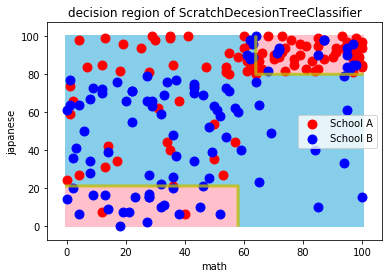

In [31]:
'''
決定領域をプロットする
'''
sdtc3.decision_region(
    X_train=X, 
    y_train=y.reshape(-1),   #set型に対応するために一次元配列にする
    title='decision region of ScratchDecesionTreeClassifier', 
    xlabel='math', 
    ylabel='japanese', 
    target_names=['School A', 'School B']
)


### インプルデータセット2で確認

In [40]:
#インスタンス生成、深さを2とする
sdtc4 = ScratchDecesionTreeClassifier(max_depth=2)

#シンプルデータセット2にてモデル作成
sdtc4.fit(X2, y2)

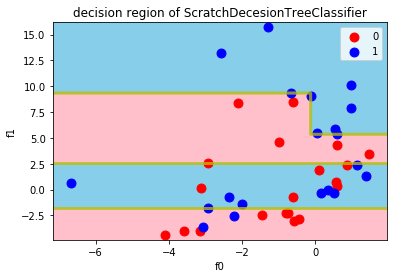

In [41]:
'''
決定領域をプロットする
'''
sdtc4.decision_region(
    X_train=X2, 
    y_train=y2.reshape(-1),   #set型に対応するために一次元配列にする
    title='decision region of ScratchDecesionTreeClassifier', 
    xlabel='f0', 
    ylabel='f1', 
    target_names=['0', '1']
)


## 【問題5】（アドバンス課題）任意の深さに対応できる決定木分類器クラスの作成
問題3,4で作成したクラスを発展させ、任意の深さに対応できる決定木分類器のクラスを作成してください。深さを特定の値で指定せず、全ての葉がジニ不純度0となるまで続けられるようにしてください。

In [50]:
#インスタンス生成、深さは指定なし
sdtc5 = ScratchDecesionTreeClassifier(max_depth=None)

#シンプルデータセット2にてモデル作成
sdtc5.fit(X2, y2)

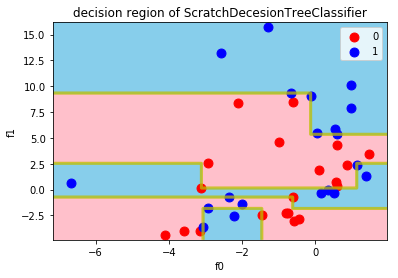

In [52]:
'''
決定領域をプロットする
'''
sdtc5.decision_region(
    X_train=X2, 
    y_train=y2.reshape(-1),   #set型に対応するために一次元配列にする
    title='decision region of ScratchDecesionTreeClassifier', 
    xlabel='f0', 
    ylabel='f1', 
    target_names=['0', '1']
)


### pyファイルで確認(classify_pipeline.py)

In [54]:
#pyファイル格納ディレクトリのパス設定
import sys
sys.path.append("/Users/yusuke-saruya/diveintocode-ml/full-time/diveintocode-term1/ml-scratch/utils/")
import classify_pipeline

In [60]:
#インスタンス生成
sdtc6 = classify_pipeline.ScratchDecesionTreeClassifier(max_depth=3)

#シンプルデータセット2にてモデル作成
sdtc6.fit(X2, y2)

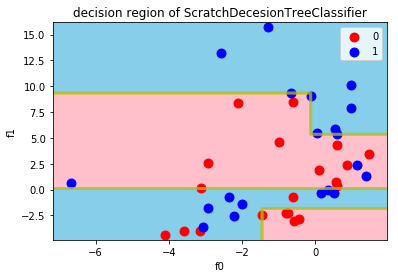

In [61]:
'''
決定領域をプロットする
'''
sdtc6.decision_region(
    X_train=X2, 
    y_train=y2.reshape(-1),   #set型に対応するために一次元配列にする
    title='decision region of ScratchDecesionTreeClassifier', 
    xlabel='f0', 
    ylabel='f1', 
    target_names=['0', '1']
)
